<a href="https://colab.research.google.com/github/Mustafamkhan/ibp_class_mustafa/blob/main/ibp_class_assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
df = pd.read_csv(r'/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [25]:
x = ['Age','TotalWorkingYears','YearsAtCompany','YearsWithCurrManager','YearsSinceLastPromotion','HourlyRate','MonthlyIncome',]
df[x]
df = df[x]

In [6]:
from matplotlib import pyplot as plt

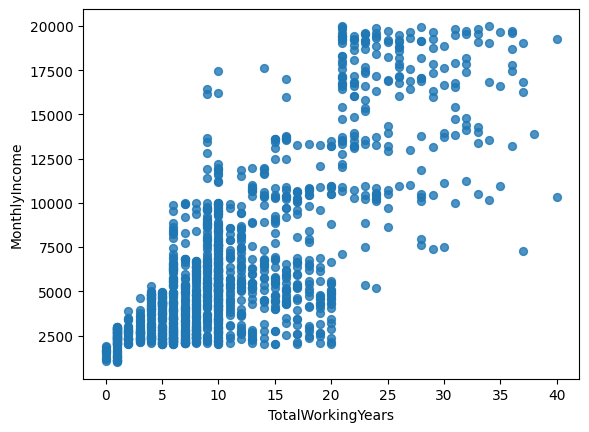

In [7]:
df.plot(kind='scatter',x='TotalWorkingYears',y='MonthlyIncome',s=32,alpha=0.8)
plt.gca().spines[['top','right',]].set_visible(True)

In [8]:
import seaborn as sns

<ipython-input-9-d10682c7063f>:1: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': 'w'}` instead.

  ax = sns.barplot(x='TotalWorkingYears',y='MonthlyIncome',errcolor='w', capsize=0.5, data=df)


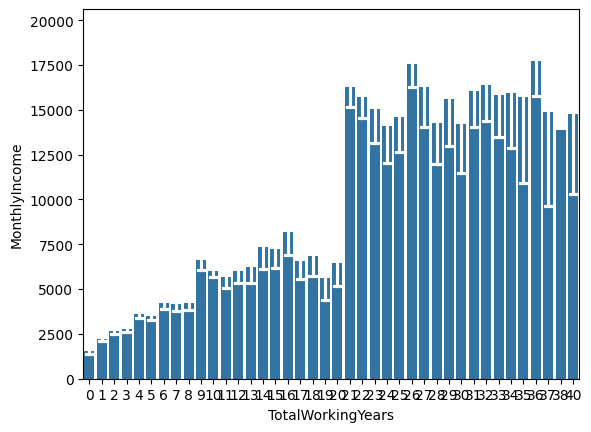

In [9]:
ax = sns.barplot(x='TotalWorkingYears',y='MonthlyIncome',errcolor='w', capsize=0.5, data=df)

In [10]:
from sklearn.linear_model import LinearRegression
import matplotlib
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [26]:
x = df.drop('TotalWorkingYears',axis=1)
# target
y = df['TotalWorkingYears']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=104,test_size=0.25,shuffle=True)

In [28]:
regr = LinearRegression()

In [29]:
regr.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = regr.predict(X_test)

In [31]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [ 0.32669468  0.34722751  0.04174831 -0.02523255  0.00210582  0.00071736]


In [32]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 12.31


In [33]:
r2_score(y_pred,y_test)

0.7208274461104933

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [35]:
random_r = RandomForestRegressor()

In [36]:
random_r.fit(X_train,y_train)

RandomForestRegressor()

In [37]:
y_pred_s = random_r.predict(X_test)

In [38]:
y_pred_s

array([ 9.3 ,  7.73, 19.77,  9.83,  6.3 ,  4.75, 32.26, 11.51,  5.58,
        4.25, 23.26,  9.58,  8.89, 21.54,  5.08,  9.57, 16.19,  6.33,
       10.04,  9.57,  7.56, 10.6 ,  8.43,  9.59, 11.12,  7.8 , 10.78,
        1.49,  7.17,  5.66, 36.08, 27.86,  8.4 , 10.15,  2.68, 12.09,
        8.16,  5.27, 10.85,  8.99, 10.34,  7.96, 10.16, 15.37, 16.8 ,
        7.35,  8.13,  6.22,  7.93, 10.15,  2.33,  7.96,  9.63, 11.62,
       11.34, 11.31,  6.46,  6.58, 16.99,  6.7 ,  6.53,  6.36, 11.38,
        1.2 ,  2.99, 21.48,  1.66,  8.4 , 26.33, 10.06, 23.58,  1.01,
       15.64, 11.66,  8.98, 15.34,  8.19, 18.68,  6.35,  0.43,  6.43,
        6.23,  9.88, 10.43,  1.9 ,  4.88,  0.  ,  9.96,  5.91,  2.35,
       25.29, 12.53, 27.53, 24.59,  5.36,  9.37, 25.43,  9.99,  2.69,
       12.58,  9.96,  3.14,  6.27,  9.24, 15.17,  4.88,  9.54,  9.67,
        8.09,  1.31, 10.53, 10.54,  9.93, 25.13, 26.75,  6.81, 21.95,
        2.83,  6.21,  0.  , 16.07,  2.44, 20.95, 13.51, 31.63, 10.07,
        3.76,  1.14,

In [39]:
scores = cross_val_score(random_r,x,y,cv=5)

In [40]:
print("Average cross-validation score:", scores.mean())

Average cross-validation score: 0.8091247039585276


In [42]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor

In [43]:
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0)

In [45]:
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [46]:
y_pred_s = random_r.predict(X_test)

In [47]:
y_pred_s

array([ 9.3 ,  7.73, 19.77,  9.83,  6.3 ,  4.75, 32.26, 11.51,  5.58,
        4.25, 23.26,  9.58,  8.89, 21.54,  5.08,  9.57, 16.19,  6.33,
       10.04,  9.57,  7.56, 10.6 ,  8.43,  9.59, 11.12,  7.8 , 10.78,
        1.49,  7.17,  5.66, 36.08, 27.86,  8.4 , 10.15,  2.68, 12.09,
        8.16,  5.27, 10.85,  8.99, 10.34,  7.96, 10.16, 15.37, 16.8 ,
        7.35,  8.13,  6.22,  7.93, 10.15,  2.33,  7.96,  9.63, 11.62,
       11.34, 11.31,  6.46,  6.58, 16.99,  6.7 ,  6.53,  6.36, 11.38,
        1.2 ,  2.99, 21.48,  1.66,  8.4 , 26.33, 10.06, 23.58,  1.01,
       15.64, 11.66,  8.98, 15.34,  8.19, 18.68,  6.35,  0.43,  6.43,
        6.23,  9.88, 10.43,  1.9 ,  4.88,  0.  ,  9.96,  5.91,  2.35,
       25.29, 12.53, 27.53, 24.59,  5.36,  9.37, 25.43,  9.99,  2.69,
       12.58,  9.96,  3.14,  6.27,  9.24, 15.17,  4.88,  9.54,  9.67,
        8.09,  1.31, 10.53, 10.54,  9.93, 25.13, 26.75,  6.81, 21.95,
        2.83,  6.21,  0.  , 16.07,  2.44, 20.95, 13.51, 31.63, 10.07,
        3.76,  1.14,